# EV353 Problem Set 1 - The Ocean Mixed Layer Heat and Salt Budgets 
## Part 2: Python Data Analysis

### Overview

The mixed layer is the uppermost layer of the surface ocean where temperature and salinity are approximately constant with depth. All exchanges of mass and energy between the ocean and the atmosphere pass through the mixed layer, making it a crucial component of climate variability.

In this problem set, you will demonstrate both your *qualitative and quantitative* understanding of the surface ocean’s heat and salinity budgets. Your responses should incorporate the concepts covered in class and the assigned readings. Chapters 1-3 in Physical Oceanography and Climate by Kris Karnauskas and this week’s scientific papers will be helpful references. 

**To foster a collaborative learning environment, you will complete this lab with a partner.** The pairings will be randomly determined in class and posted on Canvas. Each person is required to complete and contribute to all questions. This includes performing all calculations/analyses and writing your own code. *It is against the honor code to divide up the questions among different individuals or use generative AI/chatbots on any aspect this assignment. All answers must be written in your own words.*

### Learning Outcomes

After completing this assignment, you will be able to:
- Describe the physical processes that control the temperature and salinity of seawater both mathematically and in plain language.
- Apply the heat and salinity budget equations to real-world observations.
- Articulate the significance of energy and mass fluxes through the ocean-atmosphere interface in the context of the broader global climate system.

### Assignment Structure

**Part 1** includes written responses and hand calculations. To receive full credit, you must show your work and explain your reasoning. **Part 2** includes data analysis exercises in Python. You will use this Jupyter Notebooks to manipulate and visualize geospatial datasets, perform calculations, and interpret the results.

---
### Data Sets 
To complete this lab, you will need the following data sets (posted on Canvas):
1. ``oiv2.nc`` NOAA Optimal Interpolation Sea Surface Temperature version 2 (OISST v2) 
2. ``tao.nc`` NOAA Tropical Atmosphere-Ocean (TAO) Array
3. ``aquarius.nc`` Aquarius Sea Surface Salinity
4. ``gpcp.nc`` Global Precipitation Climatology Project (GPCP)

---
### Assessment
Generating high-quality figures is an important part of science comunication! All figures (time series & maps) must be properly formatted to receive full credit. This means including titles, axes labels (with units), and legends, as appropriate. The aspect ratio should be appropriate for the type of figure (i.e., the figures are not compressed or stretched). 

Please use the Python packages [cartopy](https://scitools.org.uk/cartopy/docs/latest/) and [cmocean colormaps for oceanography](https://matplotlib.org/cmocean/) when generating maps. Take care to use intuitive colormaps and colorbar levels for the type of data you are representing. 

The grading rubric for part 2 is provided at the end of the companion Word Document for this assignment.

In [1]:
# import Python packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

## Question 1 [13 points]: The Mixed Layer Heat Budget

Using the NOAA OISSTv2 product (1° latitude x 1° longitude global grid) and the TAO array, describe how the equatorial thermocline varies as a function of longitude. How does the equatorial thermocline relate to the variation of SST along the equator? Based on the relationship you identified between SST and the depth of the thermocline, where would you expect more productive marine ecosystems and why? 

To answer the questions above, use Python to generate a global map of average SST from 1982 until the end of the record. Then generate a depth vs. longitude temperature cross section along the equator using the TAO data array. Annotate your vertical cross section in code or by hand to indicate the approximate bounds of the Pacific, Atlantic, and Indian Ocean basins. Paste your final figures in your main problem set document.

**Some steps to help get you started...** 

Add cells below (**`+`**) with your code. Please use comments (**`#`**) to organize your code and make it more readable. 

1. Load the OISSTv2 data set using the xarray open_dataset function (`oiv2 = xr.open_dataset('oiv2.nc')`). *You may need to specify the full file path for the data depending on where it is stored on your computer.*
2. Define a variable called `sst` that is the sst DataArray within the oiv2 DataSet   
3. Define a variable called `sst_mean` and calculate the long-term mean SST from 1982 to the end of the record 
4. Generate a Pacific-centered map of average SST using cartopy, matplotlib, and the cmocean thermal colormap. The Robinson projection centered on 180° longitude on the Pacific is recommended. Add a colorbar and label it with the appropriate units. Some example code is provided below to help get you started. *Hint: use `sst.plot.contourf()`*
5. Add outlines for the coastlines and dashed latitude/longitude gridlines to your map to help locate the equator.
6. The land values are filled by a Cressman interpolation to produce a complete grid for possible interpolation to other grids (see documentation [here](https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html)). Given that there is no analysis over land, fill in the land to highlight only the SST data (e.g., with a lightgray color).
7. Add a title to your map and save the figure as `oiv2_mean_sst.png`
8. Load the TAO array data set for the equatorial Pacific using xarray (`tao = xr.open_dataset('tao.nc')`)
9. Plot a depth vs. longitude temperature cross section along the equator. Use the same cmocean thermal colormap and levels as the SST map to facilitate comparison. Invert the y-axis so that the surface (0 m) is at the top of the figure. Add a title and label all axes. Save the figure as `tao_mean_temp_cross_section.png`
10. Annotate the mean SST map using code (preferred) or by hand to indicate the longitude bounds of the TAO data array along the equator.

---

**Example mapping code:**

Use the following map projections and colormap:  
```
# map projection (Robinson, centered on 180° longitude in the Pacific)
proj = ccrs.Robinson(central_longitude=180)

# selected color map from cmocean colormaps for oceanography
cmap = cmocean.cm.thermal

# NumPy array for the color bar levels, add a range appropriate for the data
lev = np.arange(...enter your range here...)

# define figure and axes, figure size, and resolution (300 dpi))
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

#...add your mapping code below...

# save figure 
fig.savefig('oiv2_mean_sst.png', facecolor = 'white', transparent = False, bbox_inches ='tight')
```

In [2]:
#Question 1
#1.1
filePath = '/Users/a_rust/Documents/EV353_Oceanography/oiv2.nc'
ds = xr.open_dataset(filePath)
ds
#1.2
sst = ds['sst']
#1.3
sst_mean = sst.mean(dim='time')
ds

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 492, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2022-12-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 -1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

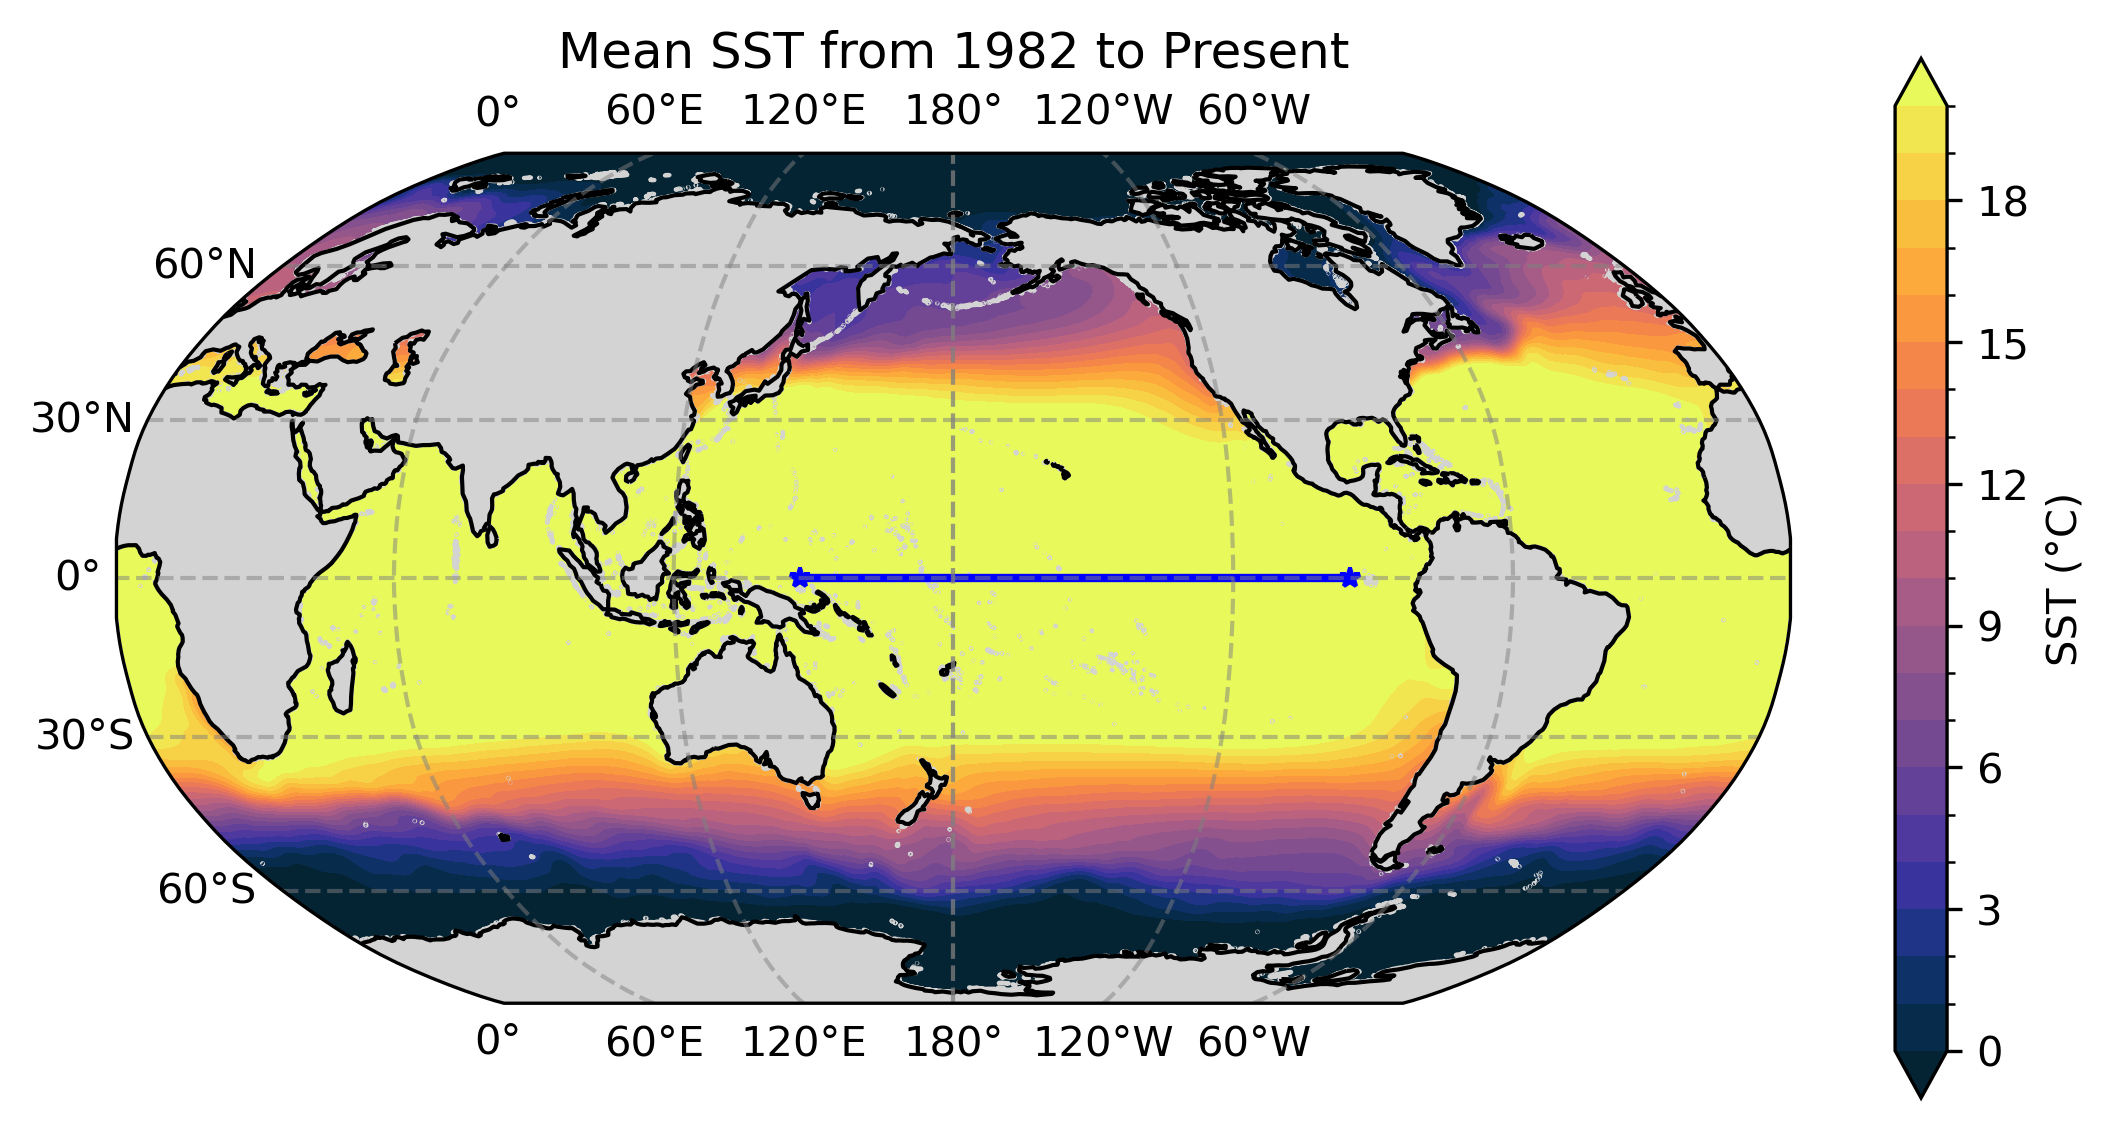

In [3]:
import cartopy as cartopy
#1.4
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.thermal
lev = np.arange(0, 21, 1)
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

sst_mean.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs= {'label': "SST (°C)"}

)

ax.add_feature(cfeature.BORDERS, linestyle ='None')

ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')

ax.add_feature(cartopy.feature.NaturalEarthFeature("physical", "land", "10m",
                                                   edgecolor='face',
                                        facecolor='lightgray'))
ax.coastlines(resolution='110m') 
ax.set_title("Mean SST from 1982 to Present")

ax.plot([147, 265], [0, 0], color='blue', linewidth=2, marker='*',
        transform=ccrs.PlateCarree(), markersize=5)

fig.savefig('oiv2_mean_sst.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

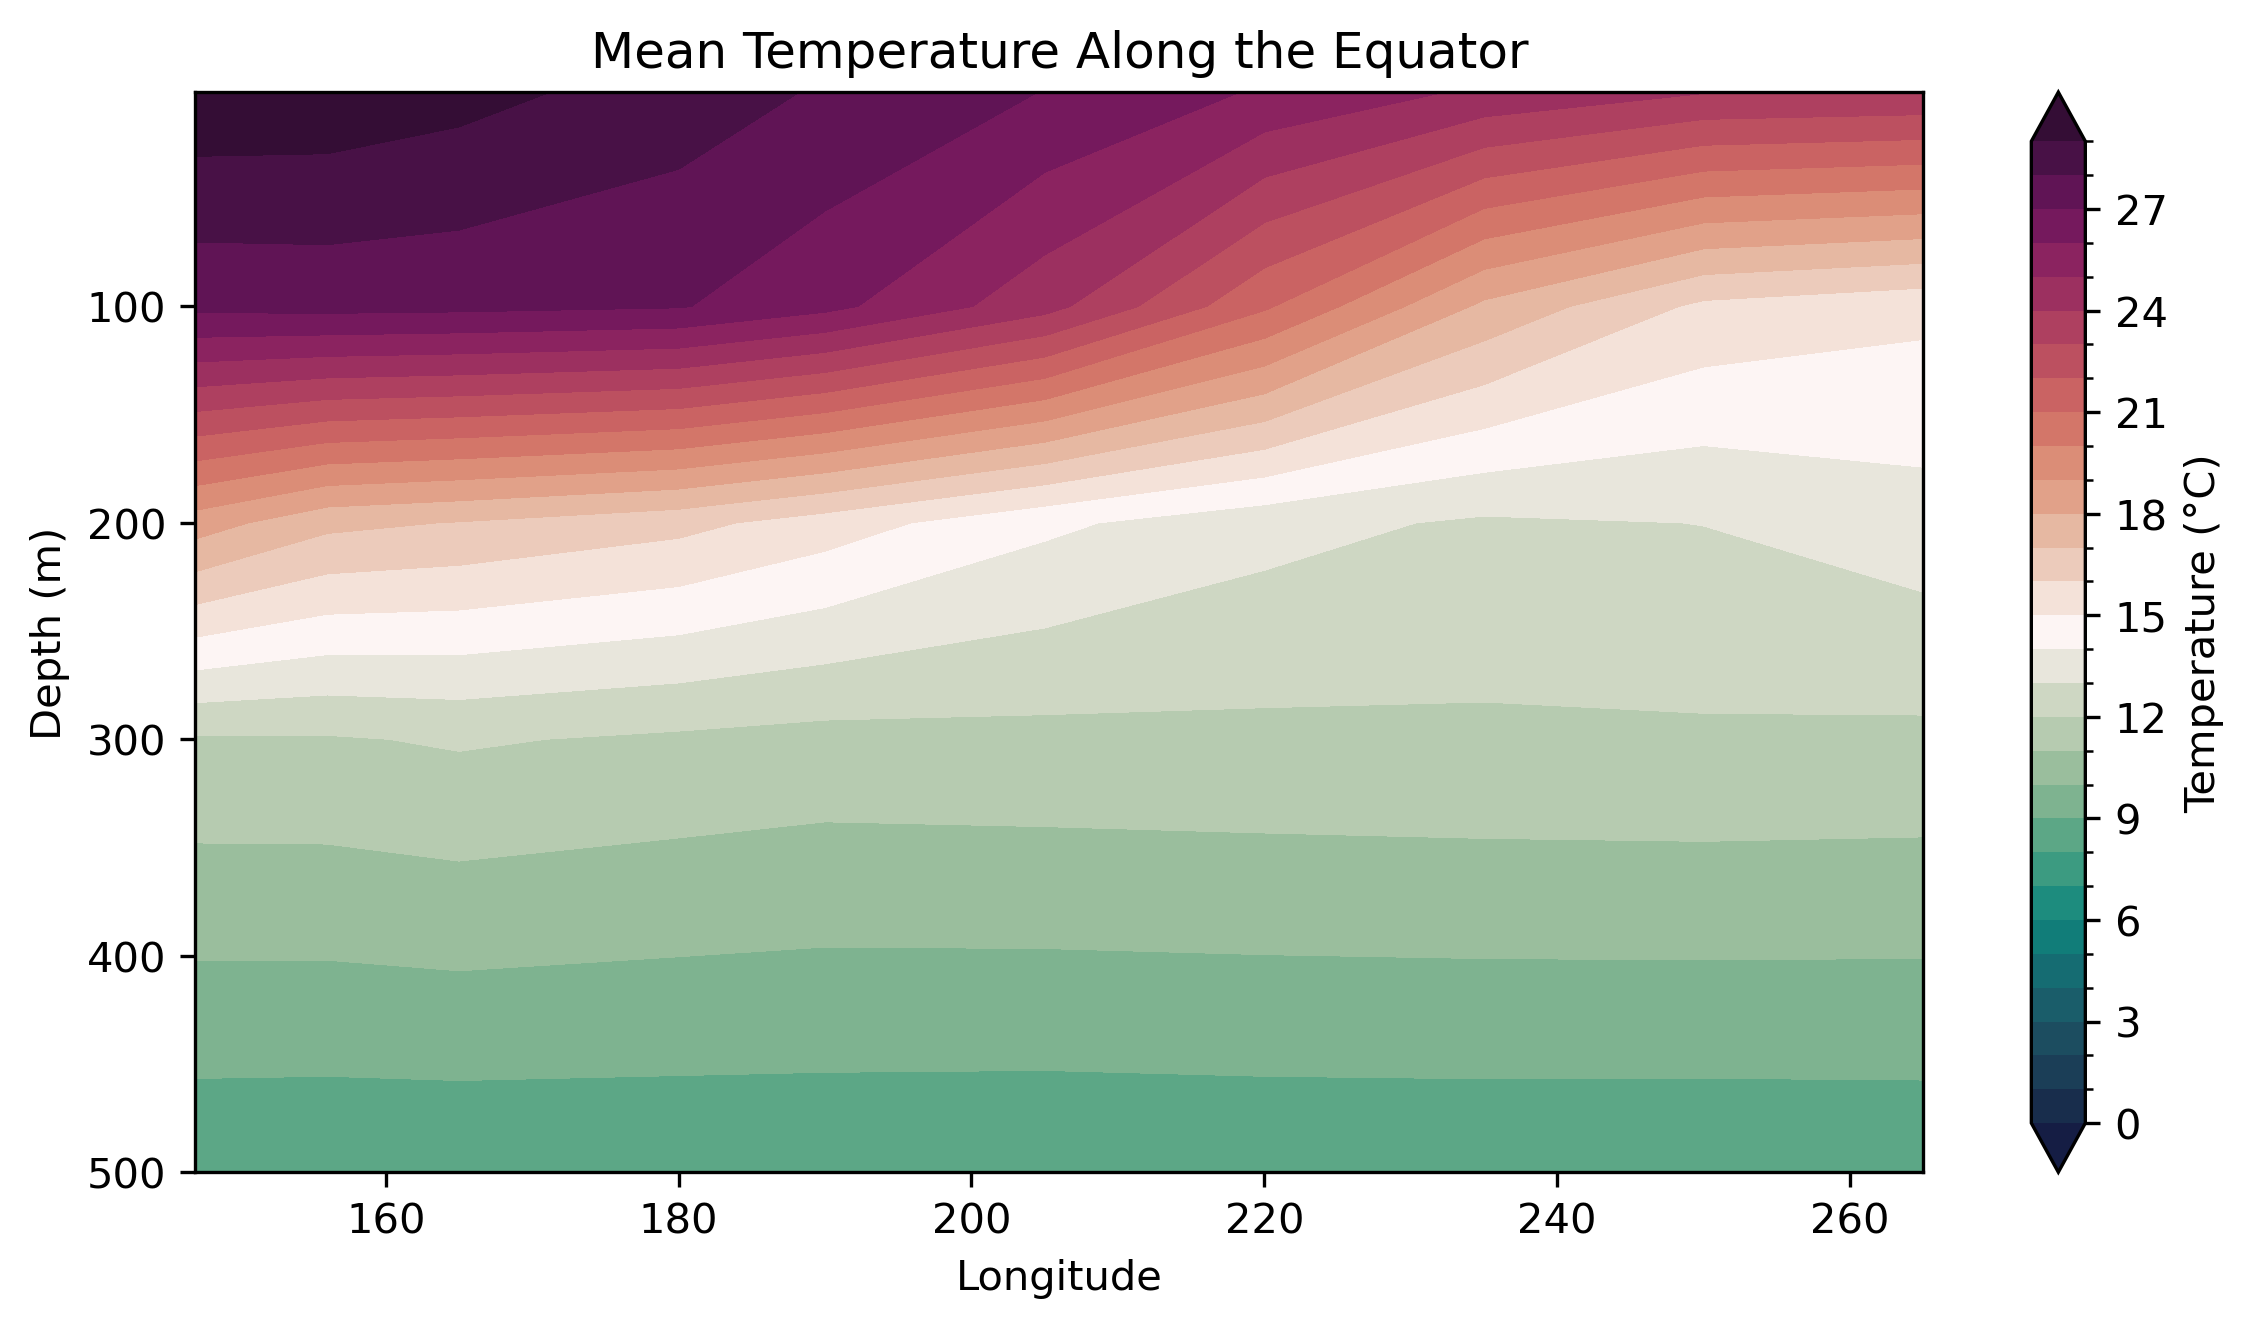

In [8]:
tao = xr.open_dataset('/Users/a_rust/Documents/EV353_Oceanography/tao.nc')
temp = tao['temp'].mean(dim='time')
cmap = cmocean.cm.curl
fig = plt.figure(figsize=(9, 4.5), dpi=300)
lev = np.arange(0, 30, 1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 


temp.plot.contourf(
    x='lon',
    y='depth',
    ax=ax,
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "Temperature (°C)"}
)

ax.invert_yaxis()
ax.set_title("Mean Temperature Along the Equator")
ax.set_xlabel("Longitude")
ax.set_ylabel("Depth (m)")

fig.savefig('tao_mean_temp_cross_section.png', facecolor = 'white', transparent = False, bbox_inches ='tight')
#lon 147-265

## Question 1: Answer
Based on these figures the equatorial thermocline decreases with an increase in longitude over the Pacific Basin. The cross section of mean temperature across the equator displays this relationship as higher temperatures persist at lower depths in the Western Pacific which progressively decrease as it travels east. For instance, at 200m at a longitude of 160 temperatures are roughly 18 degrees Celsisus, whereas at this same depth at a longitude of 260 the temperature is roughly 15 degrees Celsius. The thermocline is defined by a constant temperature that separates the mixed layer from the deep ocean below due to density differences driven by that temperature. Therefore, when that thermocline is deeper it would track that SST would be higher because they are better insulated from the cold deep water. We see this in the figure we generated of the cross section of SST along the equator--where the thermocline is deeper (160 longitude) there are higher SST (30 degrees celsius). Based on this relationship, I would expect there to be a more productive marine ecosystem in the Western pacific because the deeper thermocline creates more habitable ocean area for marine life to survive. Additionally, turbidity could play a role in these warmer waters allowing sunlight to penetrate to deeper depths and sustain more life.

## Question 2 [12 points]: The Mixed Layer Salt Budget

Compare the change in annual average precipitation from 2013 to 2014 with that of SSS by generating global maps. The Aquarius SSS data is  subset to 2012-2014. You will need to calculate the 2013 and 2014 annual averages by indexing the data. You will also need to subset the GPCP data to 2013 and 2014 before calculating each year's average. 

Plot the annual averages and the 2014-2013 differences (∆SSS & ∆P) for a total of 6 maps (3 maps per variable). Choose colormaps that intuitively represents the data and follow the same figure formatting guidelines as the SST map generated above (e.g., titles, labels, etc.). You do not need to shade the land for the precipitation data, but should for the SSS data. 

Identify 3 regions where the year-to-year change in precipitation is particularly well reflected in the SSS change and qualitatively describe your observations. Save your final figures and paste them in your group's document.

Then calculate the magnitude of the sensitivity of annual average SSS to annual average precipitation rate (∆SSS/∆P) for a location in the western Pacific off the coast of Papua New Guinea (0°N, 160°E). Then repeat this calculation for 2 other locations you identified above. Round your answers to two decimal places and include the units.

**Add cells below (**`+`**) with your code. Please use comments (**`#`**) to organize your code and make it more readable.**

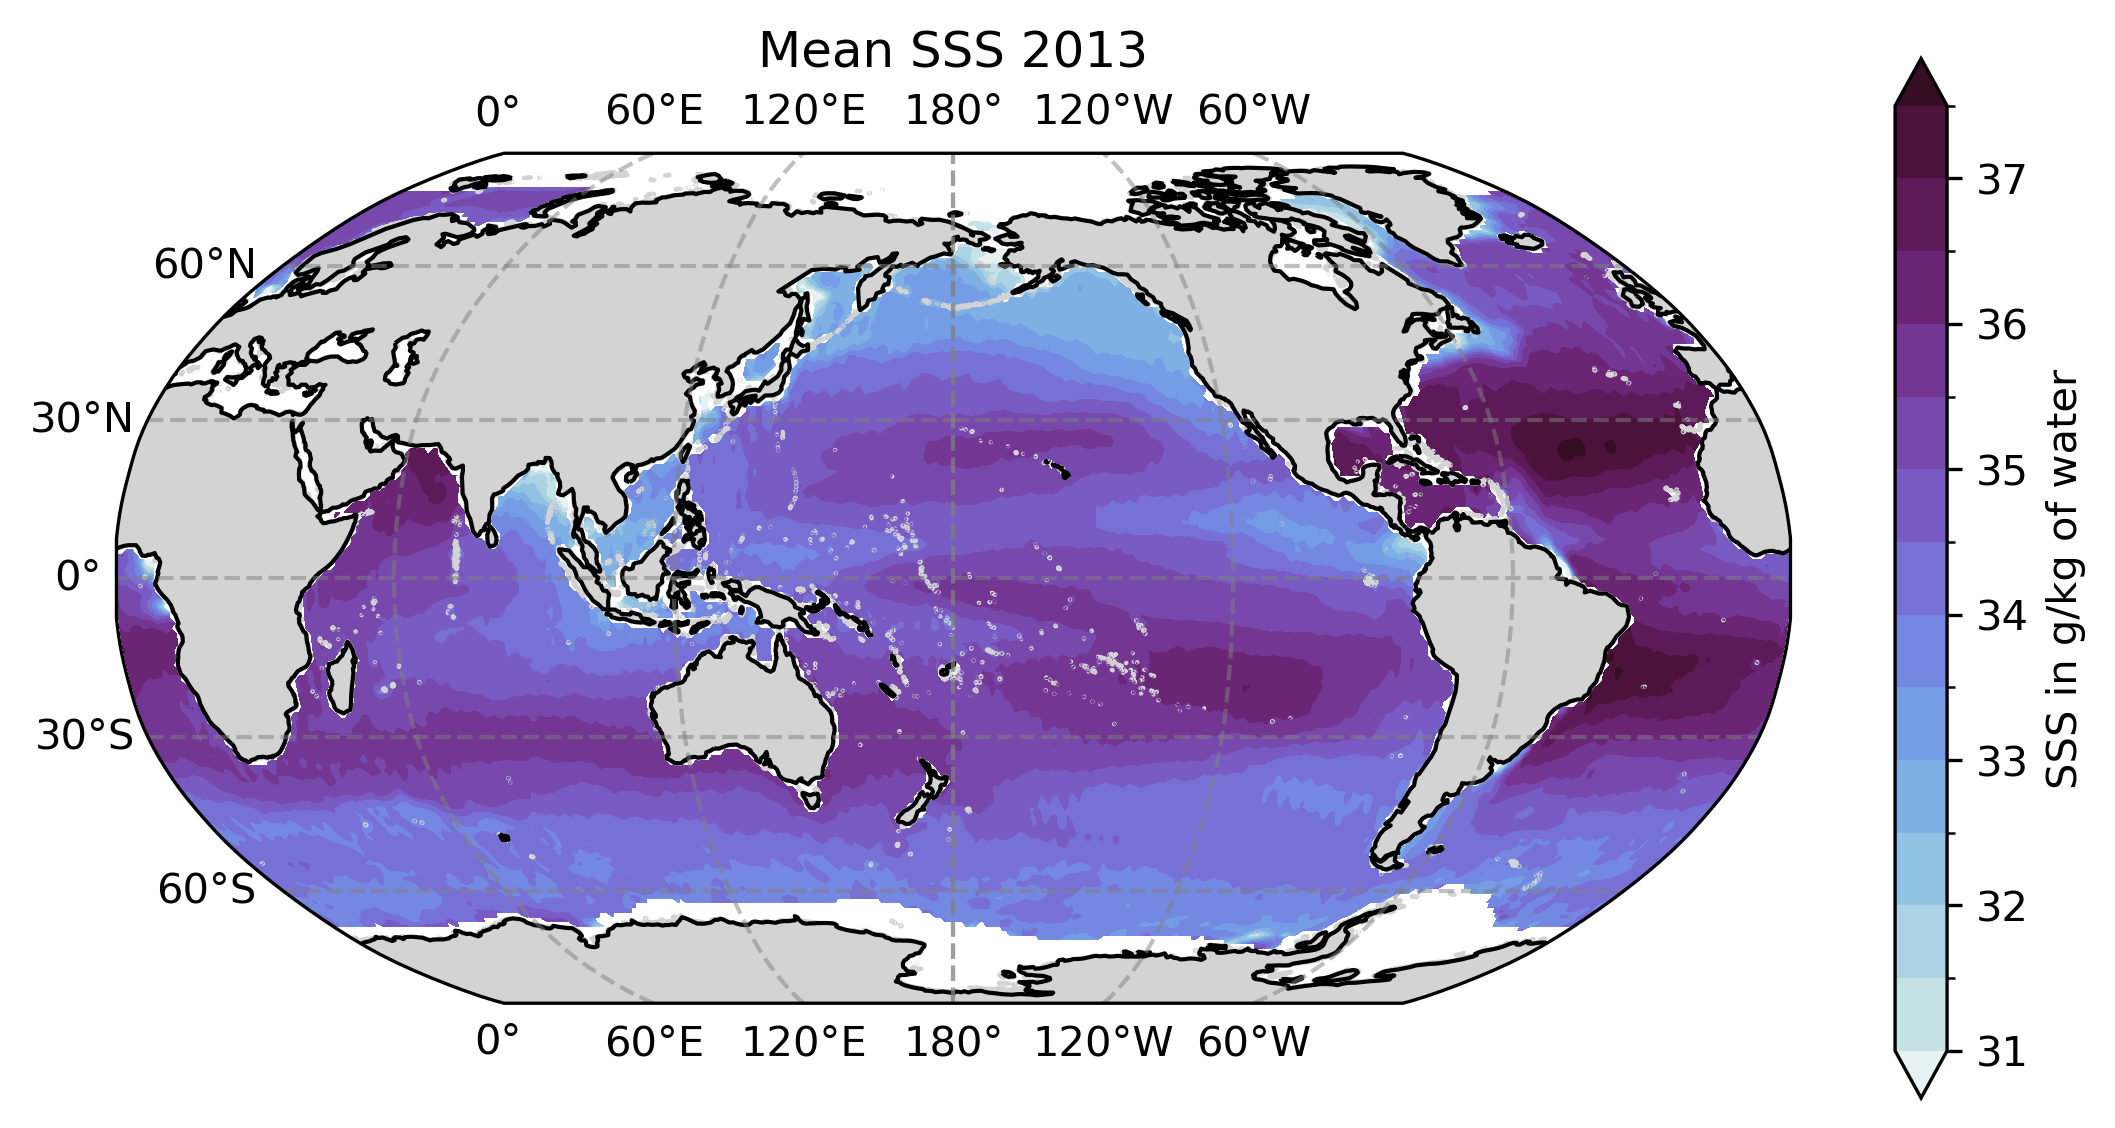

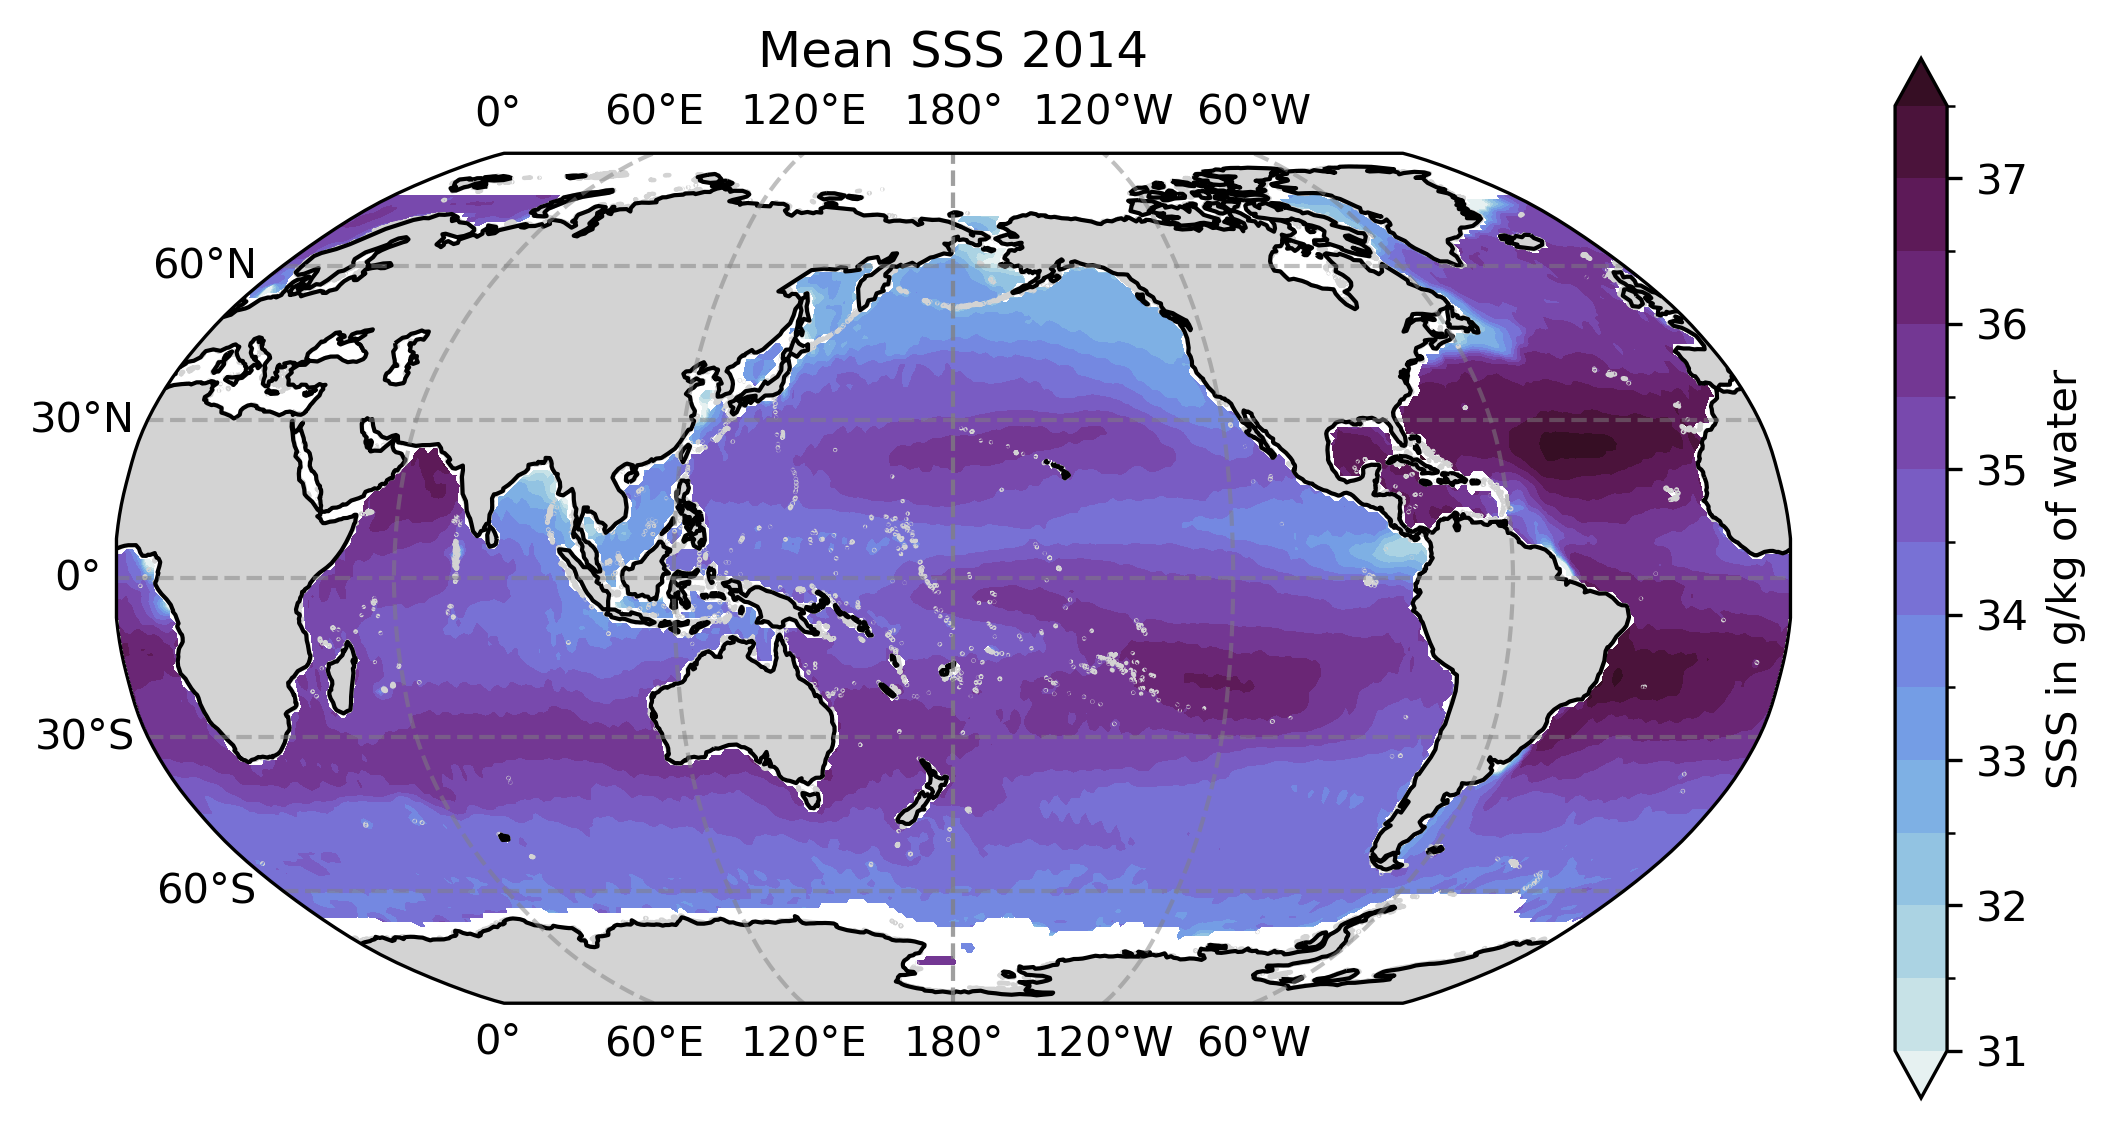

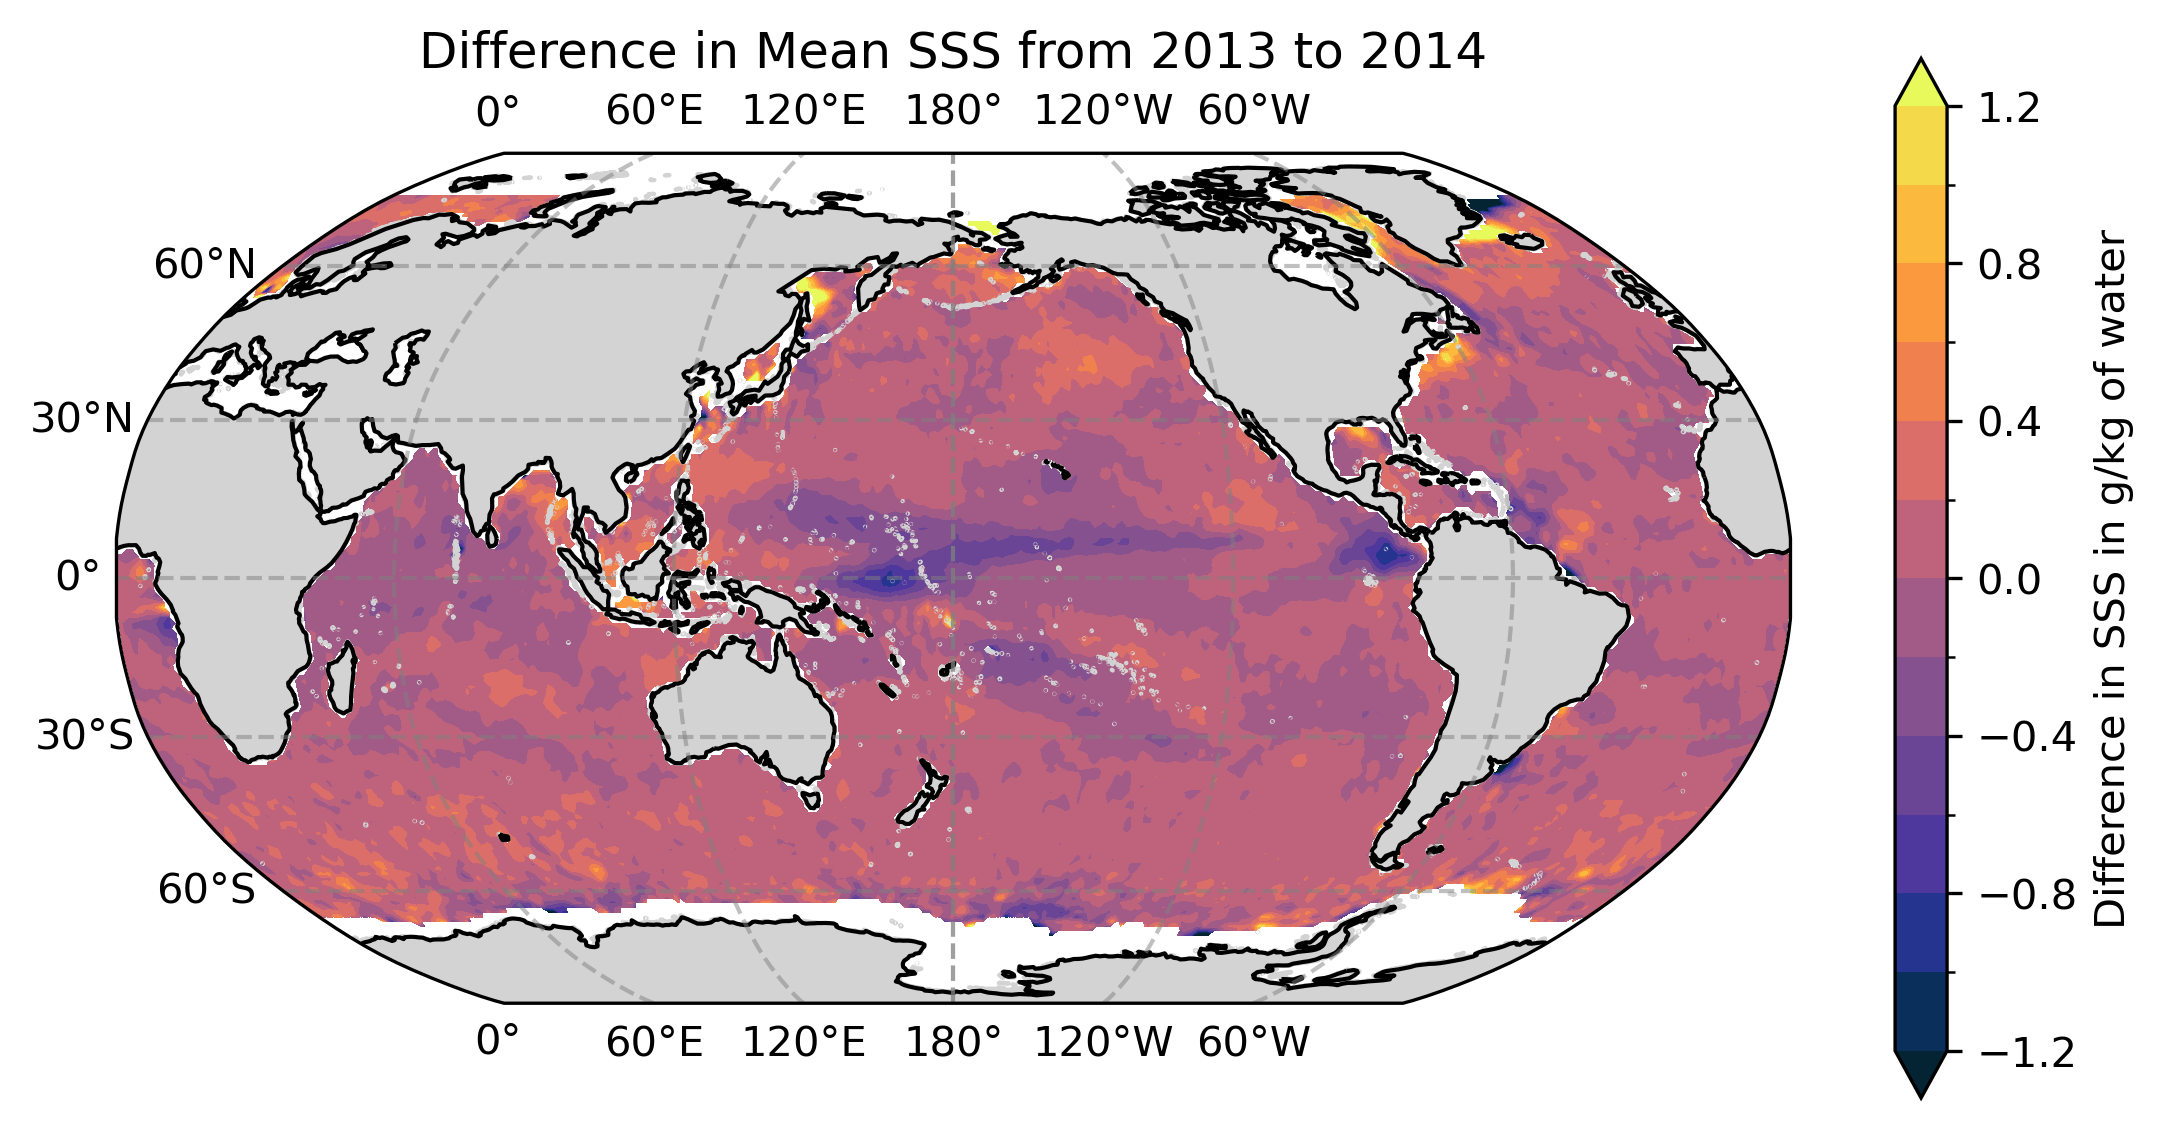

In [5]:
#Part 1
# SSS time slice
aquarius_ds = xr.open_dataset('/Users/a_rust/Documents/EV353_Oceanography/aquarius (1).nc')
sss = aquarius_ds['sss']
mean_sss_2013 = sss.sel(time=slice('2013.     ', '2013.99999')).mean(dim='time')
mean_sss_2014 = sss.sel(time=slice('2014.     ', '2014.99999')).mean(dim='time')
sss_diff = mean_sss_2014 - mean_sss_2013

#SSS 2013
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.dense
lev = np.arange(31, 38, 0.5)
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

mean_sss_2013.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs= {'label': "SSS in g/kg of water"}

)

ax.add_feature(cfeature.BORDERS, linestyle ='None')

ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')

ax.add_feature(cartopy.feature.NaturalEarthFeature("physical", "land", "10m",
                                                   edgecolor='face',
                                        facecolor='lightgray'))
ax.coastlines(resolution='110m') 
ax.set_title("Mean SSS 2013")
fig.savefig('MeanSSS2013.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

#SSS 2014
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.dense
lev = np.arange(31, 38, 0.5)
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

mean_sss_2014.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs= {'label': "SSS in g/kg of water"}

)

ax.add_feature(cfeature.BORDERS, linestyle ='None')

ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')

ax.add_feature(cartopy.feature.NaturalEarthFeature("physical", "land", "10m",
                                                   edgecolor='face',
                                        facecolor='lightgray'))
ax.coastlines(resolution='110m') 
ax.set_title("Mean SSS 2014")
fig.savefig('MeanSSS2014.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

#SSS DIff
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.thermal
lev = np.arange(-1.20, 1.40, 0.20)
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

sss_diff.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs= {'label': "Difference in SSS in g/kg of water"}

)

ax.add_feature(cfeature.BORDERS, linestyle ='None')

ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')

ax.add_feature(cartopy.feature.NaturalEarthFeature("physical", "land", "10m",
                                                   edgecolor='face',
                                        facecolor='lightgray'))
ax.coastlines(resolution='110m') 
ax.set_title("Difference in Mean SSS from 2013 to 2014")
fig.savefig('Diff_SSS.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

In [ ]:
# Precip time slice
gpcp_ds = xr.open_dataset('/Users/a_rust/Documents/EV353_Oceanography/gpcp.nc')
precip = gpcp_ds['precip']
mean_precip_2013 = precip.sel(time=slice('2013-01-01', '2013-01-31' )).mean(dim='time')
mean_precip_2014 = precip.sel(time=slice('2014-01-01', '2014-01-31')).mean(dim='time')
precip_diff = mean_precip_2014 - mean_precip_2013

#Precipitation 2013
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.rain
lev = np.arange(0, 15.5, 0.5)
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

mean_precip_2013.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs= {'label': "Precipitation in mm/day"}

)

ax.add_feature(cfeature.BORDERS, linestyle ='None')

ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')


ax.coastlines(resolution='110m') 
ax.set_title("Mean Precip 2013")
fig.savefig('MeanPrecip2013.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

#Precipitation 2014
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.rain
lev = np.arange(0, 15.5, 0.5)
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

mean_precip_2014.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs= {'label': "Precipitation in mm/day"}

)

ax.add_feature(cfeature.BORDERS, linestyle ='None')

ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')

ax.coastlines(resolution='110m') 
ax.set_title("Mean Precip 2014")
fig.savefig('MeanPrecip2013.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

#Precipitation Diff
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.diff_r
lev = np.arange(-5, 5.5, 0.5)
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

precip_diff.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs= {'label': "Difference in Precipitation in mm/day"}

)

ax.add_feature(cfeature.BORDERS, linestyle ='None')

ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')

ax.coastlines(resolution='110m') 
ax.set_title("Difference in Mean Precipitation in mm/day from 2013 to 2014")
fig.savefig('Diff_Precip.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

In [6]:
#Calculate the magnitude of the sensitivity of annual average SSS to annual average precipitation rate (∆SSS/∆P)

#Location 1 (0°N, 160°E)
sss_diff1 = sss_diff.sel(lat=0, lon=160, method='nearest')
precip_diff1 = precip_diff.sel(lat=0, lon=160, method='nearest')
sensitivity1 = (sss_diff1 / precip_diff1)
#answer = 0.72 g/kg per mm/day

#Location 2 (50°N, 150°E)
sss_diff2 = sss_diff.sel(lat=50, lon=150, method='nearest')
precip_diff2 = precip_diff.sel(lat=50, lon=150, method='nearest')
sensitivity2 = (sss_diff2 / precip_diff2)
#answer = 0.10 g/kg per mm/day

#Location 3 (5°S, 90°E)
sss_diff3 = sss_diff.sel(lat=-5, lon=90, method='nearest')
precip_diff3 = precip_diff.sel(lat=-5, lon=90, method='nearest')
sensitivity3 = (sss_diff3 / precip_diff3)
#answer = 0.02 g/kg per mm/day

NameError: name 'precip_diff' is not defined

### Canvas Submission

Work closely with your partner to ensure your answers reflect your joint understanding of the material. 

**To submit your lab:**
1. Re-run the whole Notebook and check there are no errors
2. Submit your Jupyter Notebook (LastName_FirstName_EV353_PS1.ipynb) on Canvas (1 submission per person).
3. Compile your group's written responses and all the figures you generated in a separate Word or Google document. Export the document as a PDF and upload it to Canvas (1 submission per group).